## Crop Recomendation Model

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Acessing the Dataset

In [2]:
crop = pd.read_csv('Datasets/Crop_recommendation.csv')

### Checking if dataset is loaded correctly

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Defining the features and Target

In [4]:
X = crop.drop('label', axis=1)
y = crop['label']

### Checking the features

In [5]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


### checking the Target

In [6]:

y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

## Training, Testing and Shaping

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape

(1540, 7)

In [9]:
y_train.shape

(1540,)

In [10]:
X_test.shape

(660, 7)

In [11]:
y_test.shape

(660,)

In [12]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
52,93,56,42,23.857240,82.225730,7.382763,195.094831
1354,82,25,51,24.313350,87.474091,6.074210,48.112484
1655,4,6,7,23.010143,91.117642,6.708890,112.673830
360,7,63,24,22.954582,24.035531,5.858618,107.731539
1609,13,23,6,23.961476,90.264080,7.365338,102.695870
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [13]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
979,39,17,45,18.096911,90.421774,6.924491,104.881890
1689,34,11,10,31.750489,94.595512,7.362208,115.198930
1239,20,122,204,11.797647,80.863254,6.487370,65.069625
1769,54,67,52,35.676673,93.306419,6.586107,141.338117


## Training Model


#### Necessary Imports

In [14]:
! pip install catboost
! pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [16]:
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=1000),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier(verbose=-1) 
}

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"\n{name} mode with accuracy: {score}")


LogisticRegression mode with accuracy: 0.95

GaussianNB mode with accuracy: 0.9939393939393939

SVC mode with accuracy: 0.9727272727272728

KNeighborsClassifier mode with accuracy: 0.9787878787878788

DecisionTreeClassifier mode with accuracy: 0.9833333333333333

ExtraTreeClassifier mode with accuracy: 0.9227272727272727

RandomForestClassifier mode with accuracy: 0.9939393939393939

BaggingClassifier mode with accuracy: 0.9954545454545455

GradientBoostingClassifier mode with accuracy: 0.9848484848484849

AdaBoostClassifier mode with accuracy: 0.18181818181818182

CatBoostClassifier mode with accuracy: 0.9939393939393939

LGBMClassifier mode with accuracy: 0.9893939393939394


## Ensemble Types:

### 1) Voting Classifier (Soft Voting)

In [18]:
from sklearn.ensemble import VotingClassifier

# Ensure models output probabilities (for Soft Voting)
voting_soft = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
score_soft = accuracy_score(y_test, y_pred_soft)
print(f"Voting Classifier (Soft Voting) Accuracy: {score_soft}")

Voting Classifier (Soft Voting) Accuracy: 0.996969696969697


### 2) Stacking Classifier

In [19]:
from sklearn.ensemble import StackingClassifier

# Create base learners (same as your models)
base_learners = [(name, model) for name, model in models.items()]

# Use Logistic Regression as the meta-model
meta_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
score_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacked Classifier Accuracy: {score_stack}")

Stacked Classifier Accuracy: 0.9954545454545455


### 3) Averaging Probabilities

In [20]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the class labels (from strings to integers)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming models are already trained and `all_probs` is filled with model predictions
all_probs = []
for model in models.values():
    model.fit(X_train, y_train_encoded)  # Train each model (fit to the training data)
    probs = model.predict_proba(X_test)  # Get predicted probabilities on test set
    all_probs.append(probs)

# Convert to a numpy array (shape: [num_models, num_instances, num_classes])
all_probs = np.array(all_probs)

# Step 2: Normalize the model accuracies and create weights
model_accuracies = {
    'LogisticRegression' : 0.95,
    'GaussianNB' : 0.9939393939393939,
    'SVC' : 0.9727272727272728,
    'KNeighborsClassifier' : 0.9787878787878788,
    'DecisionTreeClassifier' : 0.9833333333333333,
    'ExtraTreeClassifier' : 0.8893939393939394,
    'RandomForestClassifier': 0.9954545454545455,
    'BaggingClassifier' : 0.9924242424242424,
    'GradientBoostingClassifier' : 0.9863636363636363,
    'AdaBoostClassifier' : 0.21212121212121213,
    'CatBoostClassifier' : 0.9939393939393939,
    'LGBMClassifier' : 0.9893939393939394
}

# Normalize the weights based on model accuracies
weights = np.array([model_accuracies[model_name] for model_name in models.keys()])
weights /= np.sum(weights)

# Step 3: Average the probabilities with weights
weighted_probs = np.average(all_probs, axis=0, weights=weights)

# Step 4: Get final predictions by taking the class with the highest probability
final_pred_weighted = np.argmax(weighted_probs, axis=1)

# Step 5: Calculate accuracy (using encoded labels)
score_weighted_avg = accuracy_score(y_test_encoded, final_pred_weighted)
print(f"Weighted Averaging Accuracy: {score_weighted_avg}")

# Step 6: Convert predictions back to original labels for easier interpretation
final_pred_labels = label_encoder.inverse_transform(final_pred_weighted)

# Step 7: Optional - display sample predictions in original label format
print("Sample predictions:", final_pred_labels[:10])

Weighted Averaging Accuracy: 0.996969696969697
Sample predictions: ['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'rice'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana']


### 4) Weighted Ensemble

In [21]:
# Weights for each model (custom weights based on model performance or any strategy)
weights = {
    'LogisticRegression': 1,
    'GaussianNB': 1,
    'SVC': 2,
    'KNeighborsClassifier': 1,
    'DecisionTreeClassifier': 2,
    'ExtraTreeClassifier': 1,
    'RandomForestClassifier': 3,
    'BaggingClassifier': 1,
    'GradientBoostingClassifier': 2,
    'AdaBoostClassifier': 1,
    'CatBoostClassifier': 3,
    'LGBMClassifier': 3
}

# Weighted Voting Classifier (Soft Voting)
voting_weighted = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft', weights=[weights[name] for name in models.keys()])
voting_weighted.fit(X_train, y_train)
y_pred_weighted = voting_weighted.predict(X_test)
score_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Ensemble Accuracy: {score_weighted}")

Weighted Ensemble Accuracy: 0.9954545454545455


### 5) Blend Ensemble (Custom Blending)

In [22]:
# Train base models and get predicted probabilities
base_predictions = []
for model in models.values():
    model.fit(X_train, y_train)
    base_pred = model.predict_proba(X_test)  # Get probabilities for each class
    base_predictions.append(base_pred)

# Stack the predictions of all base models
stacked_predictions = np.hstack(base_predictions)

# Train a meta-model (Logistic Regression)
meta_model = LogisticRegression(solver='liblinear', max_iter=1000)
meta_model.fit(stacked_predictions, y_test)

# Use the meta-model to predict the final output
final_pred_blend = meta_model.predict(stacked_predictions)

# Evaluate accuracy
score_blend = accuracy_score(y_test, final_pred_blend)
print(f"Blend Ensemble (Custom Blending) Accuracy: {score_blend}")

Blend Ensemble (Custom Blending) Accuracy: 0.9984848484848485


### Since the Blend Ensemble model showed the highest accuracy, it seems like a solid option.

1.Cross-validation: Use cross-validation to estimate the performance more reliably.

2.Model Evaluation Metrics: Beyond accuracy, consider evaluating the model using other metrics like confusion matrix, precision, recall, F1-score, and ROC AUC.

3.Testing with a validation set: If you have a separate validation set (or can split off part of your data), you can test the model on that.

Cross-validated Accuracy: 0.9955 ± 0.0061

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      1.00      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange   

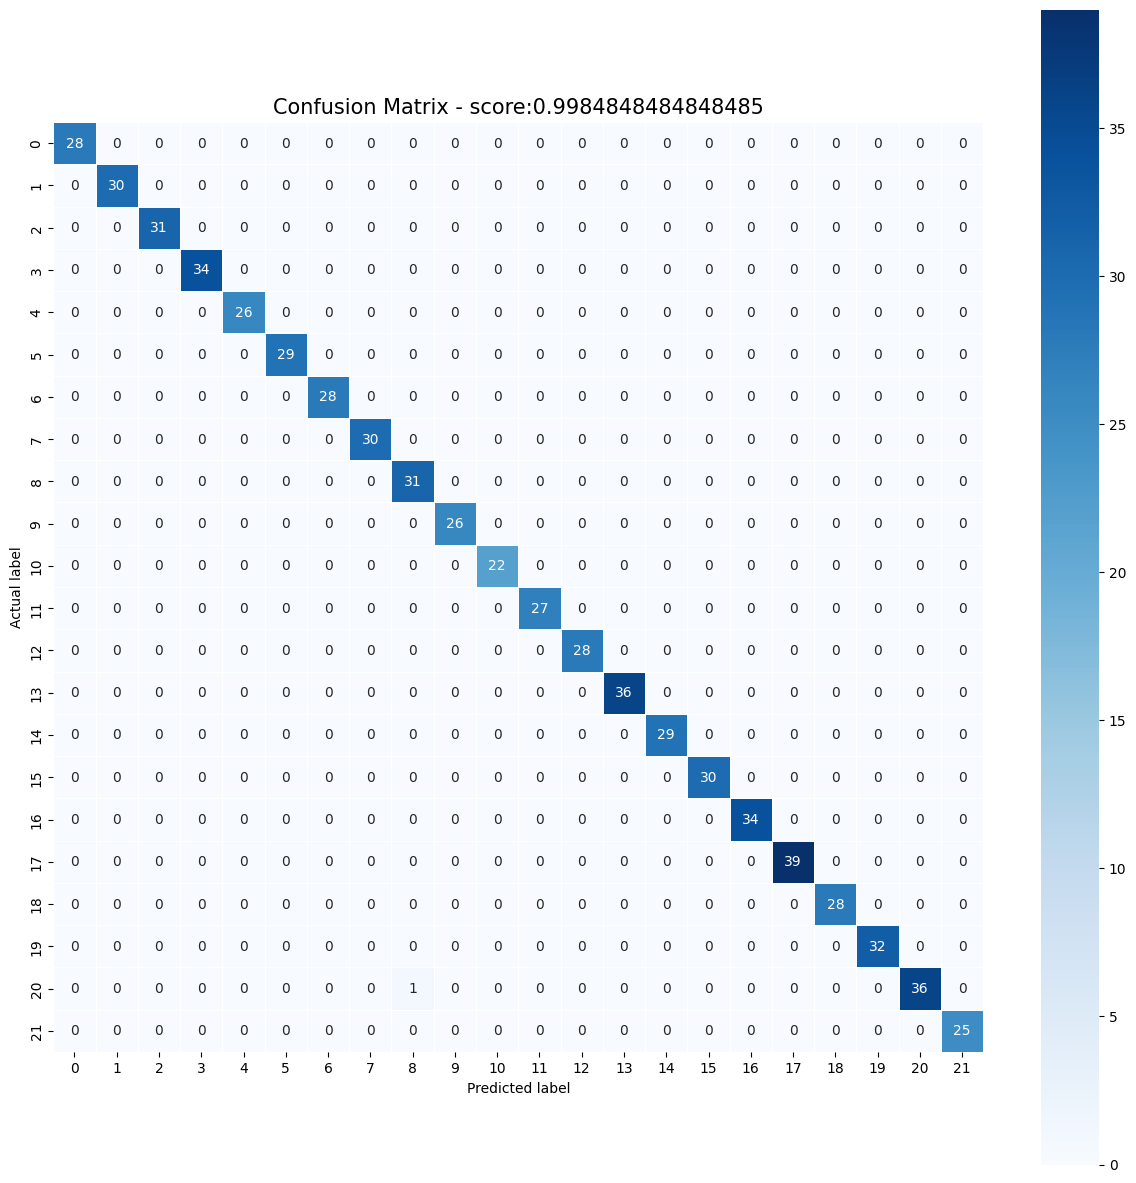

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Cross-validation to estimate model performance
cv_scores = cross_val_score(meta_model, stacked_predictions, y_test, cv=5)
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Evaluate additional metrics like precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, final_pred_blend))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, final_pred_blend)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,final_pred_blend))
plt.title(all_sample_title, size = 15);
plt.show()

# ROC AUC Score (if it's a binary classification)
if len(np.unique(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, meta_model.predict_proba(stacked_predictions)[:, 1])
    print(f"\nROC AUC Score: {roc_auc:.4f}")

## SAVING THE MODEL

In [24]:
import joblib

# Save the ensemble (meta-model and base models) together in one object
ensemble_model = {
    'base_models': models,
    'meta_model': meta_model
}

joblib.dump(ensemble_model, "Crop_Recommendation_model.pkl")

['Crop_Recommendation_model.pkl']

In [25]:
['Crop_Recommendation_model.pkl']

['Crop_Recommendation_model.pkl']